<a href="https://colab.research.google.com/github/virginiagonz/BoxOfficeRevenuePrediction/blob/main/CS4661_Project_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the data

## Github Clone
Importing the csv files from our github

In [ ]:
!git clone https://github.com/virginiagonz/BoxOfficeRevenuePrediction.git

Cloning into 'BoxOfficeRevenuePrediction'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 23 (delta 6), reused 8 (delta 2), pack-reused 0
Receiving objects: 100% (23/23), 16.76 MiB | 6.96 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
%cd /content/BoxOfficeRevenuePrediction/tmdb-box-office-prediction-data/

/content/BoxOfficeRevenuePrediction/tmdb-box-office-prediction-data


##Panda Dataframes
Setting up the panda dataframes

In [ ]:
# create the Panda Data Frames
import pandas as pd

test_file_path = 'test.csv'
train_file_path = 'train.csv'

df = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

#Data Exploration and Cleaning

In [ ]:
# Create lists of all the column names
columns_list = df.columns.tolist()
columns_list_test = df_test.columns.tolist()

In [ ]:
print(columns_list)

['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue']


In [ ]:
# Display the first 5 rows
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### Null Data

Null data is something we have to inspect. Some features we will have to determine what to do with null data. Others we may be able to eliminate because they include too much null data to be useful.

In [ ]:
df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

##

In [ ]:
df.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

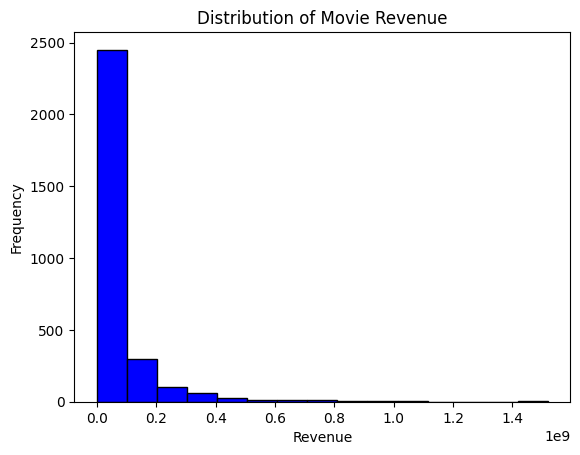

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['revenue'], bins=15, color='blue', edgecolor='black')
plt.title('Distribution of Movie Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

## Feature Selection

First thing we want to do is eliminate the features that will be of no value to us.

A few of the features we can remove by using logic. Things like URLS are not going to affect the movies revenue.

Overview and tagline are long strings, and because the keywords is formatted more ideally for our algorithm, it eliminates any value we may get from analying these categories.

In [ ]:
columns_to_drop = ['imdb_id', 'poster_path', 'overview', 'tagline', 'poster_path', 'homepage']

# I included a for loop to drop columns only if they exist, because otherwise you get errors if you add more columns after already running it.
for column in columns_to_drop:
  if column in df.columns:
    df.drop(column, axis=1, inplace=True)

In [ ]:
df.head()

,id,belongs_to_collection,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


##Feature Manipulation

The most imortant part of the release date for predicting future revenue will be the release month of the film




In [ ]:
# Convert 'release_date' to datetime and extract the month
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df['release_date'].dt.month

This is a loop that will convert the JSON format categories into python dictionaries.

In [ ]:
import ast

json_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in json_columns:
        # For each specified column, apply a lambda function to convert the text to a dictionary
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df


print(df.loc[0,'production_companies'])

[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]


### One Hot Encoding the Production_Companies Column

Replace NaN values with unique 'name' and 'id'.
Next, we will create a set that contains the unique ids for the production companies. Then, feature columns will be created for every id in the set.

In [ ]:
print(type(df['production_companies'][0]))
print(df['production_companies'][0])
df.dtypes


<class 'str'>
[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]


id                                int64
belongs_to_collection            object
budget                            int64
genres                           object
original_language                object
original_title                   object
popularity                      float64
production_companies             object
production_countries             object
release_date             datetime64[ns]
runtime                         float64
spoken_languages                 object
status                           object
title                            object
Keywords                         object
cast                             object
crew                             object
revenue                           int64
release_month                     int64
dtype: object

In [ ]:
# Fill NaN values with unique data.
# Format it as {'name': 'NaN1', id: -1} where the integer in NaN
# is increasing and id is decreasing after every iteration with a NaN value
# All values need to be string in the feature column before converting it
# to a list of dictionaries

import json

# Initialize counters for NaN values with an id
id_value = -1


for index, value in df['production_companies'].items():
    if pd.isna(value):
        # Create the replacement value
        replacement_value = [{'id': id_value}]

        # Convert the replacement value to a string
        replacement_value_str = json.dumps(replacement_value)

        # Replace NaN with the unique data
        df.at[index, 'production_companies'] = replacement_value_str

        # Update counter
        id_value -= 1


print(df.loc[:9,'production_companies'])


0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                         [{"id": -1}]
4                                         [{"id": -2}]
5                                         [{"id": -3}]
6    [{'name': 'Ghost House Pictures', 'id': 768}, ...
7                                         [{"id": -4}]
8    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
9    [{'name': 'Castle Rock Entertainment', 'id': 97}]
Name: production_companies, dtype: object


In [ ]:
# Define a function to convert string to list of dictionaries
def convert_to_list_of_dicts(row):
  return ast.literal_eval(row)

df['production_companies'] = df['production_companies'].apply(convert_to_list_of_dicts)

In [ ]:
# Initialize an empty list to store all the id values
id_list = []

# Iterate through each row in the 'production_companies' column
for row in df['production_companies']:

  # Check if the value is a list
  if isinstance(row, (list, dict, str, object)):
    # Extract 'id' values from the list of dictionaries in each row
    for company in row:
      # Check if the element is a dictionary and contains 'id' key with an integer value
      if isinstance(company, dict):
        id_list.append(company['id'])

# Display the list of all 'id' values (both positive and negative integers)
# This will be used as the new feature columns
id_set = set(id_list)
# print(id_list)

In [ ]:
# Create a DataFrame with zeros, where rows correspond to the original DataFrame rows
ohe_production_companies = pd.DataFrame(0, index=df.index, columns=id_list)

# Perform One-Hot Encoding
for index, row in df.iterrows():
    if isinstance(row['production_companies'], list):
        for company in row['production_companies']:
            if 'id' in company and company['id'] in id_list:
                ohe_production_companies.at[index, company['id']] = 1

# Concatenate DataFrames
df = pd.concat([df, ohe_production_companies], axis=1)

# Drop the original 'production_companies' column
# df = df.drop(columns=['production_companies'])

# pd.set_option('display.max_columns', None)
# print(df.head())

### One Hot Encoding the Crew Column

In [ ]:
# Initialize counters for NaN values and id
crew_id_value = -200


for index, value in df['crew'].items():
    if pd.isna(value):
        # Create the replacement value
        replacement_crew_value = [{'id': crew_id_value}]

        # Convert the replacement value to a string
        replacement_crew_value_str = json.dumps(replacement_crew_value)

        # Replace NaN with the unique data
        df.at[index, 'crew'] = replacement_crew_value_str

        # Update counter
        crew_id_value -= 1


In [ ]:

df['crew'] = df['crew'].apply(convert_to_list_of_dicts)

In [ ]:
# Initialize an empty list to store all the id values
crew_id_list = []

# Iterate through each row in the 'crew' column
for row in df['crew']:

  # Check if the value is a list
  if isinstance(row, list):
    # Extract 'id' values from the list of dictionaries in each row
    for crew in row:
      # Check if the element is a dictionary and contains 'id' key with an integer value
      if isinstance(crew, dict):
        crew_id_list.append(crew['id'])

# Place id_list into a set to keep unique ids
# This will be used as the new feature columns
crew_id_list = list(set(crew_id_list))
# print(crew_id_list)

In [ ]:
# Create a DataFrame with zeros, where rows correspond to the original DataFrame rows
ohe_crew = pd.DataFrame(0, index=df.index, columns=crew_id_list)

# Perform One-Hot Encoding
for index, row in df.iterrows():
    if isinstance(row['crew'], list):
        for crew in row['crew']:
            if 'id' in crew and crew['id'] in crew_id_list:
                ohe_crew.at[index, crew['id']] = 1

# Concatenate DataFrames
df = pd.concat([df, ohe_crew], axis=1)

# print(df.head())

# Drop the original 'crew' column
# df = df.drop(columns=['crew'])

### One Hot Encoding the Cast Column

In [ ]:
print(df.loc[0,'cast'])

[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character'

In [ ]:
# Initialize counters for NaN values and id
nan_counter = 1

for index, value in df['cast'].items():
    if pd.isna(value):
        # Create the replacement value
        replacement_name_value = [{'name': f'NaN{nan_counter}'}]

        # Convert the replacement value to a string
        replacement_name_value_str = json.dumps(replacement_name_value)

        # Replace NaN with the unique data
        df.at[index, 'cast'] = replacement_name_value_str

        # Update counters
        nan_counter += 1


In [ ]:
df['cast'] = df['cast'].apply(convert_to_list_of_dicts)

In [ ]:
# Initialize an empty list to store all the id values
cast_list = []

# Iterate through each row in the 'crew' column
for row in df['cast']:

  # Check if the value is a list
  if isinstance(row, list):
    # Extract 'id' values from the list of dictionaries in each row
    for cast in row:
      # Check if the element is a dictionary and contains 'id' key with an integer value
      if isinstance(cast, dict):
        cast_list.append(cast['name'])

# Place id_list into a set to keep unique ids
# This will be used as the new feature columns
cast_list = list(set(cast_list))
# print(cast_list)

In [ ]:
# Create a DataFrame with zeros, where rows correspond to the original DataFrame rows
ohe_cast = pd.DataFrame(0, index=df.index, columns=cast_list)

# Perform One-Hot Encoding
for index, row in df.iterrows():
    if isinstance(row['cast'], list):
        for cast in row['cast']:
            if 'name' in cast and cast['name'] in cast_list:
                ohe_cast.at[index, cast['name']] = 1

# Concatenate DataFrames
df = pd.concat([df, ohe_cast], axis=1)

# print(df['Rob Corddry'])

# Drop the original 'cast' column
# df = df.drop(columns=['cast'])

### One Hot Encoding for Genre

In [ ]:
print(df.loc[0,'genres'])

[{'id': 35, 'name': 'Comedy'}]


In [ ]:
# Initialize counters for NaN values and id
nan_counter_genre = 1

for index, value in df['genres'].items():
    if pd.isna(value):
        # Create the replacement value
        replacement_genre_value = [{'name': f'NaN{nan_counter_genre}'}]

        # Convert the replacement value to a string
        replacement_genre_value_str = json.dumps(replacement_genre_value)

        # Replace NaN with the unique data
        df.at[index, 'genres'] = replacement_genre_value_str

        # Update counters
        nan_counter_genre += 1

In [ ]:
df['genres'] = df['genres'].apply(convert_to_list_of_dicts)

In [ ]:
# Initialize an empty list to store all the id values
genre_list = []

# Iterate through each row in the 'crew' column
for row in df['genres']:

  # Check if the value is a list
  if isinstance(row, list):
    # Extract 'id' values from the list of dictionaries in each row
    for genre in row:
      # Check if the element is a dictionary and contains 'id' key with an integer value
      if isinstance(genre, dict):
        genre_list.append(genre['name'])

# Place id_list into a set to keep unique ids
# This will be used as the new feature columns
genre_list = list(set(genre_list))
# print(genre_list)

In [ ]:
# Create a DataFrame with zeros, where rows correspond to the original DataFrame rows
ohe_genre = pd.DataFrame(0, index=df.index, columns=genre_list)

# Perform One-Hot Encoding
for index, row in df.iterrows():
    if isinstance(row['genres'], list):
        for genre in row['genres']:
            if 'name' in genre and genre['name'] in genre_list:
                ohe_genre.at[index, genre['name']] = 1

# Concatenate DataFrames
df = pd.concat([df, ohe_genre], axis=1)

# print(df['Comedy'])

# Drop the original 'genres' column
# df = df.drop(columns=['genres'])

### One Hot Encoding the Languages Column

In [ ]:
# Perform one-hot encoding for 'original_language'
language_dummies = pd.get_dummies(df['original_language'], prefix='language')

# Concatenate the one-hot encoded columns to the original DataFrame
df = pd.concat([df, language_dummies], axis=1)

# Drop the original 'original_language' column
# df = df.drop(columns=['original_language'])

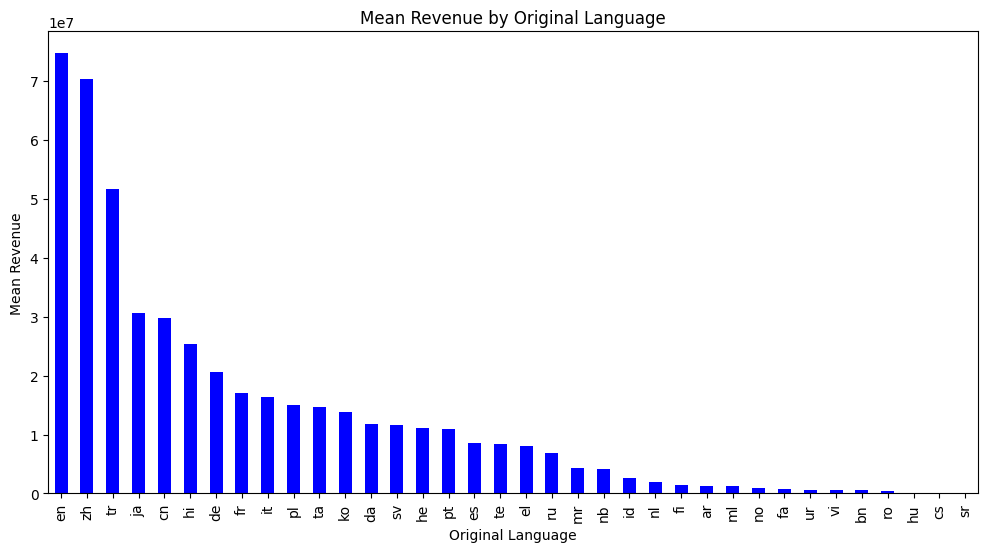

In [ ]:
language_revenue_stats = df.groupby('original_language')['revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
language_revenue_stats.plot(kind='bar', color='blue')
plt.title('Mean Revenue by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Mean Revenue')
plt.show()